In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
df.shape

(14999, 10)

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [9]:
df.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


<AxesSubplot:xlabel='left'>

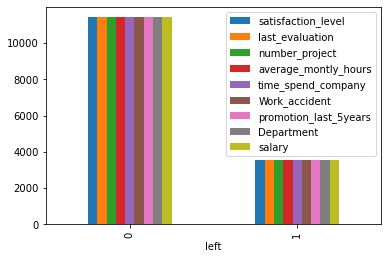

In [10]:
df.groupby('left').count().plot(kind='bar')

In [11]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

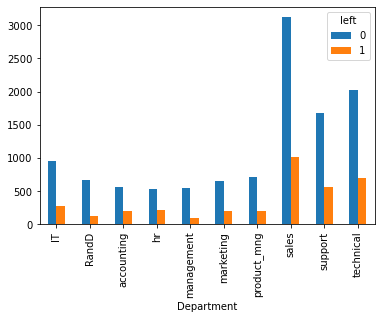

In [12]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<AxesSubplot:xlabel='salary'>

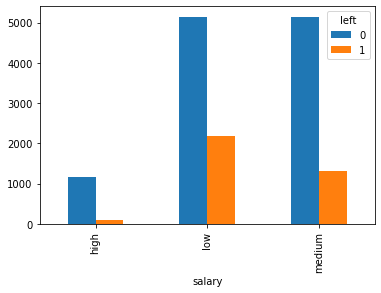

In [13]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [32]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','Work_accident','salary']]

In [34]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


In [35]:
salary_dummies = pd.get_dummies(subdf.salary,prefix="salary",drop_first=True)

In [17]:
salary_dummies.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [36]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis=1)

In [37]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary,salary_low,salary_medium
0,0.38,157,0,0,low,1,0
1,0.80,262,0,0,medium,0,1
2,0.11,272,0,0,medium,0,1
3,0.72,223,0,0,low,1,0
4,0.37,159,0,0,low,1,0


In [38]:
df_with_dummies.drop('salary',axis=1,inplace=True)

In [39]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [40]:
X = df_with_dummies.copy()
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [41]:
y = df.left

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
model.score(X_test,y_test)

0.7675555555555555

In [30]:
model.score(X_train,y_train)

0.7782645966282503

In [45]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
model.score(X_test,y_test)

0.77

In [47]:
model.score(X_train,y_train)

0.7791218211258215